*** No CODEPAGE record, no encoding_override: will use 'ascii'
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
derivative2->  -9000.0
derivative2->  -70323.3005157057
derivative2->  -664748.7168571516
derivative2->  -387597.4954571544
derivative2->  -223673.29214241062
derivative2->  -126965.21868930386
derivative2->  -70263.32157226668
derivative2->  -37471.47661543719
derivative2->  -19013.875601249947
derivative2->  -9090.377510401115
derivative2->  -4092.5955246862754
derivative2->  -1763.9742553719616
derivative2->  -760.8533132080589
derivative2->  -357.58416121963904
derivative2->  -204.30315618248673
derivative2->  -148.63362744709121
derivative2->  -129.2440652547073
derivative2->  -122.81762788562455
derivative2->  -120.85026405416059
derivative2->  -120.34353801318831
derivative2->  -120.27663001773763
derivative2->  -120.31860436248164
derivative2->  -120.37135854461131
derivative2->  -120.41154162066019
derivative2->  -120.43760322040418
derivativ

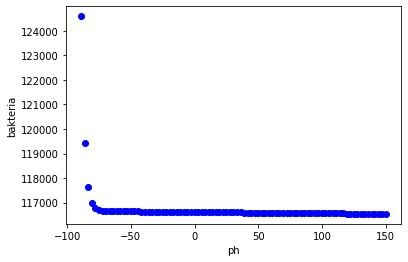

[17.74072489  5.12976052]
dot->  341.04776240914396
cost->  116541.05614344806
[5.129760515550509, 22.8704854010292, 40.61121028650789, 58.35193517198658, 76.09266005746528, 93.83338494294398, 111.57410982842266, 129.31483471390135, 147.05555959938005, 164.79628448485875, 182.53700937033744, 200.2777342558161, 218.0184591412948, 235.7591840267735, 253.49990891225218, 271.2406337977309, 288.9813586832096, 306.7220835686883, 324.462808454167, 342.2035333396457, 359.9442582251244, 377.684983110603, 395.4257079960817, 413.1664328815604, 430.9071577670391, 448.6478826525178, 466.3886075379965, 484.1293324234752, 501.87005730895385, 519.6107821944325, 537.3515070799112, 555.0922319653899, 572.8329568508686, 590.5736817363473]


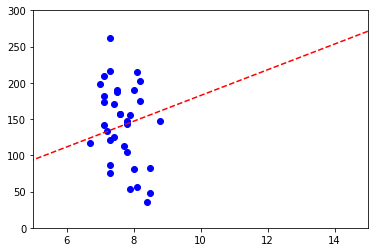

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data_path = "/home/andreas/Documents/regression/ph-r.xls"
data = pd.read_excel(data_path)
print(type(data))
print(type(data['X']))


x_train = data['X']
y_train = data['Y']


plt.xlabel("ph")
plt.ylabel("bakteria")

ones = np.ones(len(x_train))

x = np.array(list(zip(x_train,ones)))
y = np.array(y_train)
# print(x)

def cost(x,y):
  return sum((x-y)**2)
def derivative(x,y):
  return sum((x-y)*2*x)
def der1(x,y, w):
  return -sum((y- w@x.T)*2*x.T[0])
def der2(x,y, w):
  return -sum((y- w@x.T)*2)
# find with traing the right w
der = []
costt = []

dest = np.linspace(-100,150, 91)
# print(dest)
w1 = 1.0
w2 = 1.0
prev1 = w1
prev2 = w2
a = 0.0001
w = np.array([w1,w2])
# costt.append(cost(y, w@x.T))
prev_cost = 699248.0
w1 = 2.0
w2 = 2.0
der_made2 = -9000.0
der_made1 = 1
for i in dest:

  w = np.array([w1,w2])
  # print("cost-> ", cost(y, w@x.T))
  d1 = der1(x,y,w)
  d2 = der2(x,y,w)
  print("derivative2-> " , der_made2)
  # print("derivative1-> ", d1)
  # deri = derivative(y  w@x.T)
  # print("dev1+dev2 ", sum(w[0]*x.T[0])+ sum(w[1]*x.T[1]), " deri    deri)
  #   int(w)
  der.append(d1)
  # prev_cost = 
  costt.append(cost(y,  w@x.T))
  # print(co  t[-1])
  # prin  d1+d2)
  prev1 = w1
  prev2 = w2
  w1 = prev1  - a*d1
  w2 = prev2  - a*d2
  der_made1 = (costt[-1] - prev_cost)/(w1  - prev1)
  der_made2 = (costt[-1] - prev_cost)/(w2  - prev2)
  prev_cost = costt[-1]
  d_w_t = w
  

plt.plot( dest[4:], costt[4:], "bo")
plt.show()

d_w = (np.linalg.inv((x.T)@x)@((x.T)@y) )
d_w = d_w_t
print(d_w)
print("dot-> ",d_w.dot(d_w_t))
print("cost-> ", cost(y, d_w@x.T))
ones = np.ones(len(x_train))
x_test = np.array(list(zip(range(len(ones)), ones)))

def line(d_x,x_test):
  return d_w@x_test

y_test = [line(d_w,x) for x in x_test]
print(y_test)
plt.axis([5,15, 0, 300])
plt.plot(x_train, y_train, 'bo', x_test, y_test, "r--")
plt.show()


In [ ]:
!pwd